# Task 2.5 - Visual Weather Systems CNN

## Table of Contents

#### 1. Importing Libraries
#### 2. Loading and Pre-processing Weather Images
#### 3. Compiling and Running
#### 4. Results
#### 5. Bonus Task

### 1. Importing Libraries

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import Input
from keras.models import Sequential
from keras.models import Model
from keras.layers import Conv1D, Conv2D, Dense, Dropout, BatchNormalization, Flatten, MaxPooling2D, Activation
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

In [6]:
# Turning off warning feature
import warnings
warnings.filterwarnings('ignore')

In [8]:
import keras
import tensorflow as tf
print(f"Keras version: {keras.__version__}")
print(f"TensorFlow version: {tf.__version__}")

Keras version: 3.8.0
TensorFlow version: 2.18.0


### 2. Loading and Pre-processing Weather Images

In [15]:
# Download the weather images and put them in a directory

path = r'C:\Users\IVON6\ClimateWins\02 Data\Original Data\Multi-class Weather Dataset'
folders = os.listdir(path)
print(folders)

['Cloudy', 'Rain', 'Shine', 'Sunrise']


In [17]:
# This will load in the pictures and rescale them to 250x250pixels

datagenerator = ImageDataGenerator(rescale=1/255, validation_split=0.2)
train_generator = datagenerator.flow_from_directory(
    path,
    target_size=(250 , 250),
    batch_size=12,
    subset='training',
)

test_generator = datagenerator.flow_from_directory(
    path,
    target_size=(250 , 250),
    batch_size=12,
    subset='validation',
)

Found 901 images belonging to 4 classes.
Found 224 images belonging to 4 classes.


In [19]:
# This is a CNN to categorize the weather images

inputs = Input(shape=(250, 250, 3))

x = Conv2D(32, (5,5), activation = 'relu')(inputs)
x = MaxPooling2D(3,3)(x)
x = Conv2D(64, (5,5) , activation = 'relu')(x)
x = MaxPooling2D((3,3))(x)
x = Conv2D(128 , (5,5) , activation = 'relu')(x)
x = MaxPooling2D(3,3)(x)
x = Flatten()(x)
x = Dropout(0.5, seed = 5)(x)
x = Dense(128 , activation = 'relu')(x)

outputs = Dense(4, activation = 'softmax')(x)

model:Model = Model(inputs=inputs, outputs=outputs)

### 3. Compiling and Runnning

In [22]:
# How many epochs are required to generate an accurate model?

model.compile(optimizer="Adam", loss="mean_squared_error", metrics=["accuracy"])
model.fit(
    train_generator, 
    epochs = 20,
    steps_per_epoch = train_generator.n // train_generator.batch_size,
    validation_data = test_generator,
    validation_steps = test_generator.n // test_generator.batch_size,
)

Epoch 1/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 17s 201ms/step - accuracy: 0.4714 - loss: 0.1418 - val_accuracy: 0.7037 - val_loss: 0.0882
Epoch 2/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9167 - loss: 0.0452 - val_accuracy: 0.6944 - val_loss: 0.0930
Epoch 3/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 8s 102ms/step - accuracy: 0.7371 - loss: 0.0868 - val_accuracy: 0.7315 - val_loss: 0.0965
Epoch 4/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.7500 - loss: 0.0672 - val_accuracy: 0.7269 - val_loss: 0.1021
Epoch 5/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 8s 104ms/step - accuracy: 0.8319 - loss: 0.0660 - val_accuracy: 0.8102 - val_loss: 0.0681
Epoch 6/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.7500 - loss: 0.0643 - val_accuracy: 0.8565 - val_loss: 0.0609
Epoch 7/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 8s 107ms/step - accuracy: 0.8291 - loss: 0.0682 - val_accuracy: 0.7963 - val_loss: 0.0733
Epoch 8/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9167 - loss: 0.0692 - val_accuracy: 0.777

### 4. Results

In [25]:
results = pd.DataFrame(model.history.history)

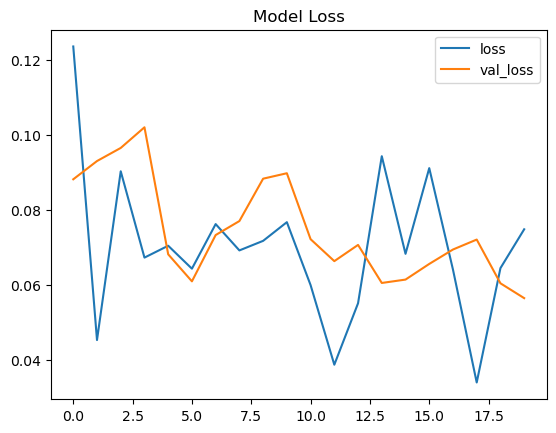

In [27]:
results[['loss','val_loss']].plot(title='Model Loss')
plt.savefig('./loss.png')

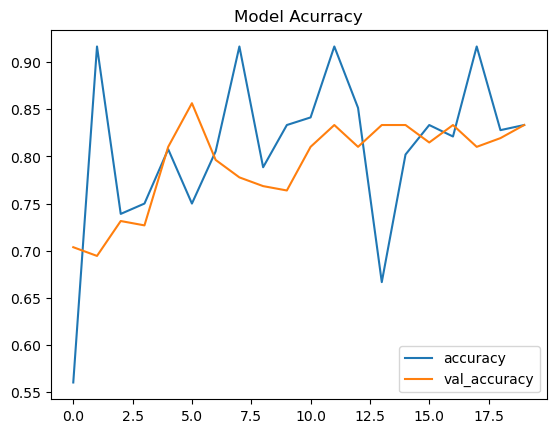

In [29]:
results[['accuracy','val_accuracy']].plot(title='Model Acurracy')
plt.savefig('./accuracy.png')

In [31]:
# Print the accuracy and loss
print("Accuracy: {}, Val_Accuracy: {}".format(results['accuracy'].iloc[-1], results['val_accuracy'].iloc[-1]))
print("Loss: {}, Val_Loss: {}".format(results['loss'].iloc[-1], results['val_loss'].iloc[-1]))

Accuracy: 0.8333333134651184, Val_Accuracy: 0.8333333134651184
Loss: 0.07480228692293167, Val_Loss: 0.05640774592757225


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


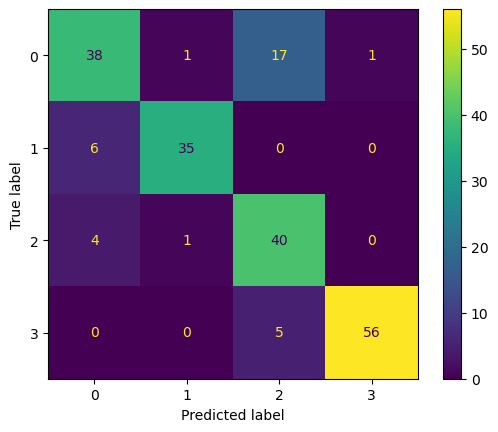

In [33]:
# Collect n batches of images and display the confusion matrix for them.

class_names = ['Cloudy', 'Rain', 'Shine', 'Sunrise']
n = 16 #<--you can change the number of batches selected.

image_batch, classes_batch = next(test_generator)

for batch in range(n):
    temp = next(test_generator)
    image_batch = np.concatenate((image_batch, temp[0]))
    classes_batch = np.concatenate((classes_batch, temp[1]))

classes_batch = classes_batch
y_predict = model.predict(image_batch)

# Confusion matrix for training data
cm = confusion_matrix(y_pred = [np.argmax(x) for x in y_predict], y_true = [np.argmax(x) for x in classes_batch])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [35]:
# This function will display a number of random images as well as the predictions for the type of weather.

def predict_one(model, num_images = None):  
    image_batch, classes_batch = next(test_generator)
    predicted_batch = model.predict(image_batch)
    for k in range(0,image_batch.shape[0] if num_images is None else num_images):
        image = image_batch[k]
        real_class = class_names[np.argmax(classes_batch[k])]
        predicted_class = class_names[np.argmax(predicted_batch[k])]
        value_predicted = predicted_batch[k]
        isTrue = (real_class == predicted_class)
        plt.figure(k)
        plt.title(str("Correct Prediction" if isTrue else "Incorrect Prediction") + ' - class: ' + real_class + ' - ' + 'predicted: ' + predicted_class + str(value_predicted))
        plt.axis('off')
        plt.savefig('./' + real_class + '_' + predicted_class + '_' + str(value_predicted) + '.png')
        plt.imshow(image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


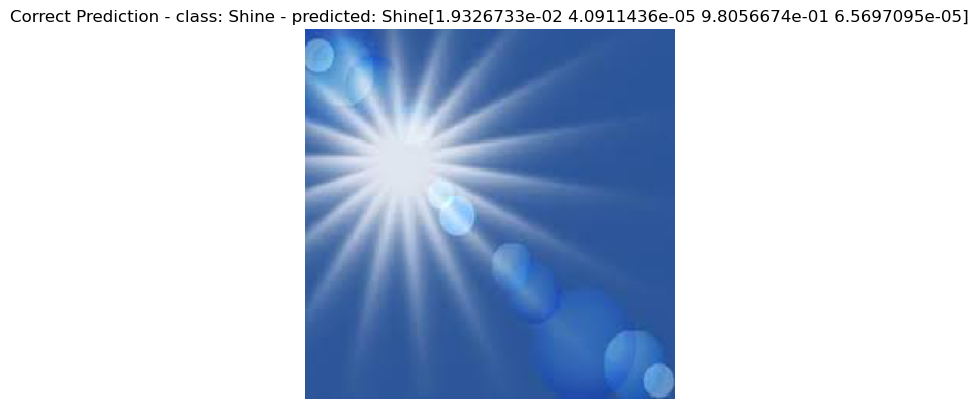

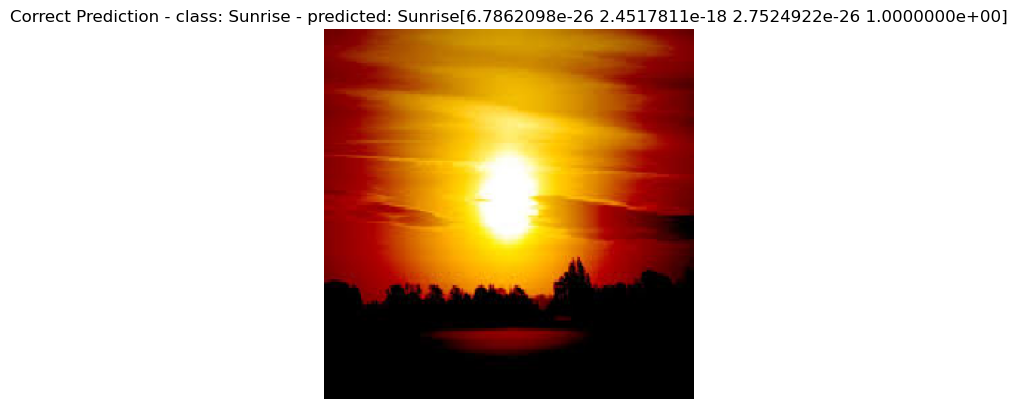

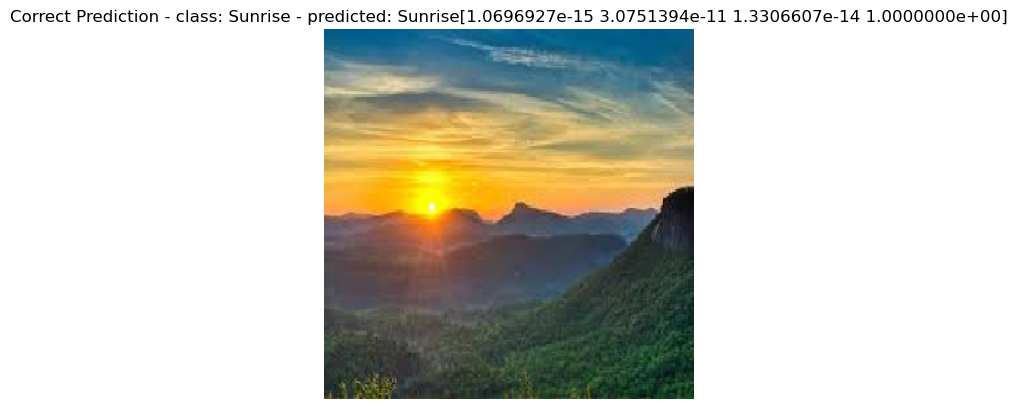

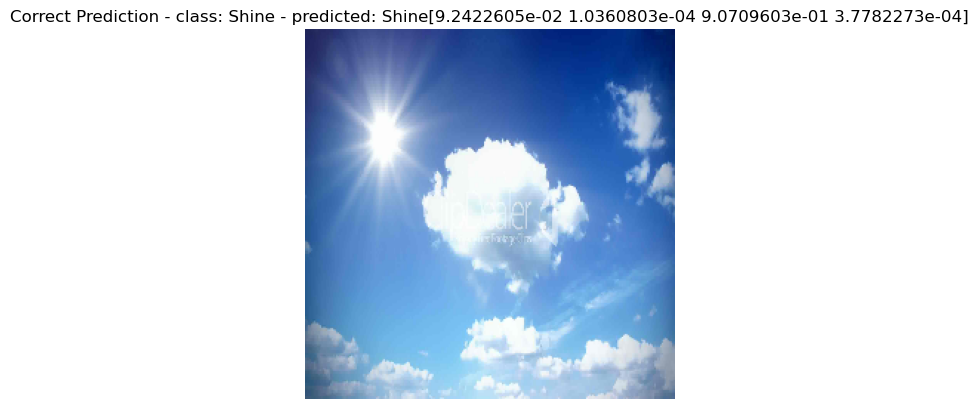

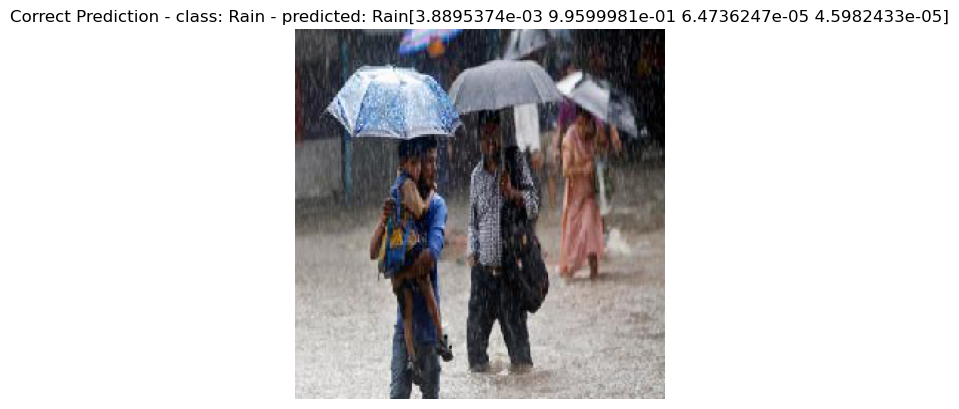

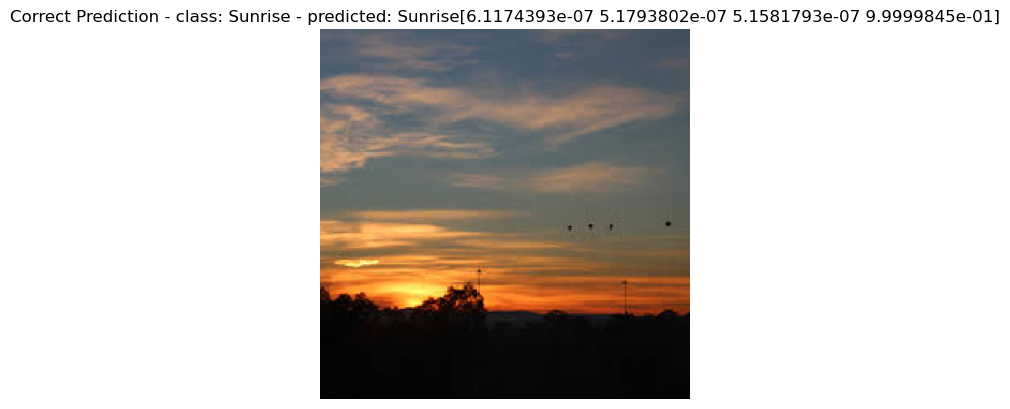

In [37]:
predict_one(model, 6) #<--you can show multiple pictures with this command. Just fill in the number you want to see.

### 5. Bonus Task

#### Take a picture of one or more of the four weather conditions in part 2 of the task near where you live. Does your model correctly identify it? Upload the picture(s), as well as what the algorithm thought it was.

In [61]:
# Download the weather images and put them in a directory

path = r'C:\Users\IVON6\ClimateWins\02 Data\Original Data\MyTown'
folders = os.listdir(path)
print(folders)

['pic1.jpg', 'pic2.jpg', 'pic3.jpg']


In [65]:
from PIL import Image

img = Image.open(os.path.join(path,'pic2.jpg'))
print(img.format)
print(img.size)
print(img.mode)

JPEG
(640, 430)
RGB


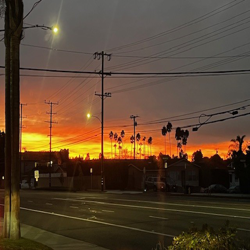

In [67]:
newsize = (250,250)
img2 = img.resize(newsize)
img2

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


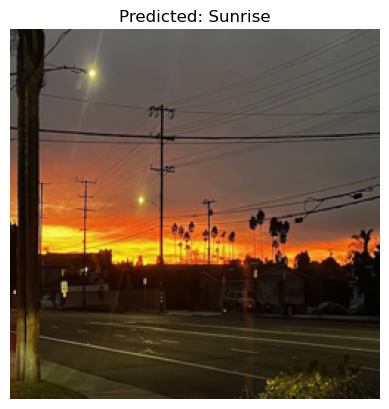

In [69]:
# Define the function to predict and display a single image

def predict_one(model, img2, class_names):
    # Convert the image to RGB (in case it's RGBA)
    img2_rgb = img2.convert('RGB')
    
    # Convert the image to a NumPy array and preprocess for the model
    img_array = np.array(img2_rgb)
    
    # Add batch dimension to the image, as models expect batches
    img_array = np.expand_dims(img_array, axis=0)
    
    # Predict the class
    predicted_batch = model.predict(img_array)
    
    # Since we have only one image, we'll deal with the first element
    predicted_class = class_names[np.argmax(predicted_batch[0])]
    value_predicted = predicted_batch[0]
    
    # Display the image and prediction
    plt.figure()
    plt.title(f'Predicted: {predicted_class}')
    plt.axis('off')
    plt.imshow(img2_rgb)
    plt.show()

# Call the function
predict_one(model, img2, class_names)